<a href="https://colab.research.google.com/github/sandalis05/MIT-FutureMakers/blob/main/Overfitting%20Reduction/Visualizing_Loss_and_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
from sklearn.model_selection import train_test_split

#train split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#validation and test split
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 18ms/step - loss: 0.7082 - accuracy: 0.5205 - val_loss: 0.7012 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5041 - val_loss: 0.6914 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5357 - val_loss: 0.6852 - val_accuracy: 0.6027
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6032 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6296 - val_loss: 0.6762 - val_accuracy: 0.7306
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.6807 - val_loss: 0.6721 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6916 - val_loss: 0.6676 - val_accuracy: 0.7671
Epoch 8/100

In [11]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8721


0.8721461296081543

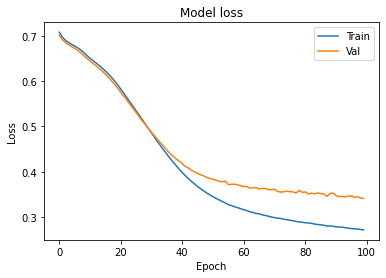

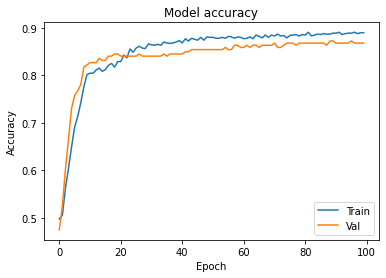

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
#model 3 - has the model 2 dropout and regularization but reduces overfitting

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 66ms/step - loss: 21.1584 - accuracy: 0.5498 - val_loss: 3.8993 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 2s 51ms/step - loss: 2.4993 - accuracy: 0.8330 - val_loss: 0.6936 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 50ms/step - loss: 0.6077 - accuracy: 0.8649 - val_loss: 0.5547 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 2s 54ms/step - loss: 0.5126 - accuracy: 0.8633 - val_loss: 0.5548 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5068 - accuracy: 0.8687 - val_loss: 0.5873 - val_accuracy: 0.8128
Epoch 6/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5044 - accuracy: 0.8443 - val_loss: 0.5145 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4725 - accuracy: 0.8791 - val_loss: 0.4867 - val_accuracy: 0.8813
Epoch

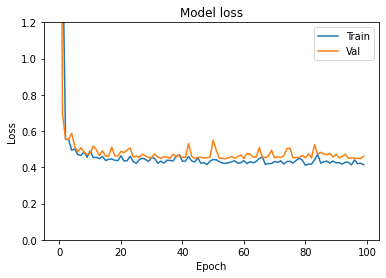

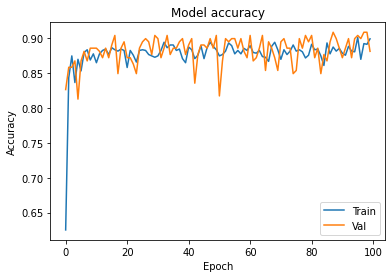

In [15]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# **Practice with reducing Overfitting through Regularization**

In [16]:
import matplotlib.pyplot as plt

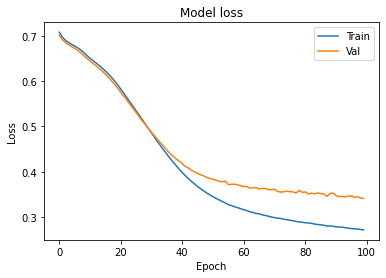

In [17]:
# visualize training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

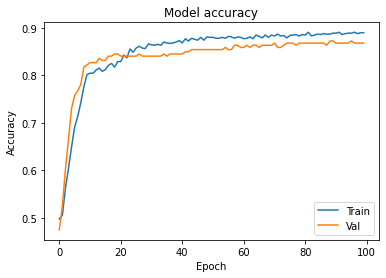

In [20]:
# visualize training and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
# enter regularization 
## here's a model that is badly overfitted (for an example)

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 48ms/step - loss: 0.5534 - accuracy: 0.6539 - val_loss: 0.4465 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3270 - accuracy: 0.8655 - val_loss: 0.4182 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3032 - accuracy: 0.8608 - val_loss: 0.3876 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2865 - accuracy: 0.8723 - val_loss: 0.3815 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2572 - accuracy: 0.8857 - val_loss: 0.3879 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 40ms/step - loss: 0.2412 - accuracy: 0.8997 - val_loss: 0.3653 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 40ms/step - loss: 0.2104 - accuracy: 0.9147 - val_loss: 0.3527 - val_accuracy: 0.9041
Epoch 

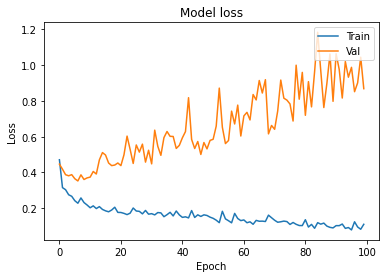

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

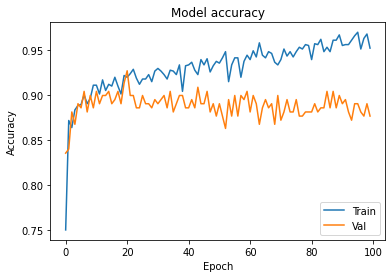

In [26]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Strategies to reduce Overfitting


In [27]:
# import code needed for dropout and regularization
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 64ms/step - loss: 21.1153 - accuracy: 0.5674 - val_loss: 3.9492 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 2.5313 - accuracy: 0.8053 - val_loss: 0.7065 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5957 - accuracy: 0.8482 - val_loss: 0.5392 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4890 - accuracy: 0.8817 - val_loss: 0.5281 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5129 - accuracy: 0.8675 - val_loss: 0.5091 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4921 - accuracy: 0.8561 - val_loss: 0.5851 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4883 - accuracy: 0.8711 - val_loss: 0.4998 - val_accuracy: 0.8858
Epoch

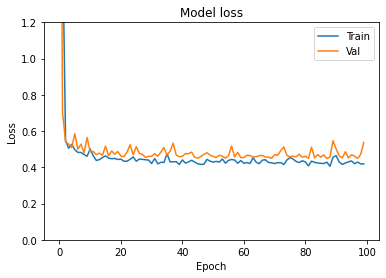

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

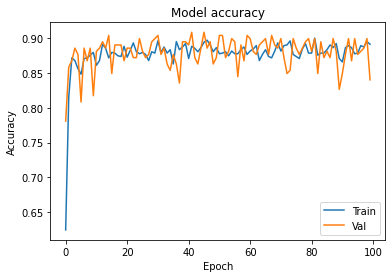

In [34]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()